In [2]:
import pandas as pd  
import numpy as np  
import tensorflow as tf  
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read Datasets Greenhouse Data
temp_emissions_data = pd.read_csv('Datasets/TempEmissionsDataRaw.csv')
temp_emissions_data_compressed = pd.read_csv('Datasets/TempEmissionsData.csv') # Emissions normalized (10^3)

In [4]:
temp_emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14826 entries, 0 to 14825
Data columns (total 4 columns):
Year                  14826 non-null int64
Country               14826 non-null object
AverageTemperature    14826 non-null float64
EmissionsValue        14826 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 463.4+ KB


In [7]:
temp_emissions_data_compressed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
Year                  263 non-null int64
AverageTemperature    263 non-null float64
EmissionsValue        263 non-null float64
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


In [8]:
# Remove Year Column
temp_emissions_data_no_year = temp_emissions_data.drop('Year', axis=1)
temp_emissions_data_no_year

,Country,AverageTemperature,EmissionsValue
0,United Kingdom,5.89,2552
1,United Kingdom,3.13,2553
2,United Kingdom,8.43,2553
3,United Kingdom,8.34,2554
4,United Kingdom,8.05,2555
5,United Kingdom,8.54,2731
6,United Kingdom,8.50,2732
7,United Kingdom,7.70,2733
8,United Kingdom,8.68,2734
9,United Kingdom,8.03,2734


In [9]:
temp_emissions_data_no_year.describe().T

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,14826.0,17.649508,9.646473,-20.45,10.08,21.27,25.80,30.13
EmissionsValue,14826.0,23001.269729,112937.992320,-1473.00,152.00,1110.00,8538.25,2797384.00


In [23]:
# Get the features
X = temp_emissions_data_no_year['EmissionsValue'].to_frame() # independent variable - GasEmissions
y = temp_emissions_data_no_year['AverageTemperature'].to_frame() # dependent variable - AverageTemperature

In [24]:
## Split data into train, test and validation set

In [25]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)  

In [26]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

In [27]:
X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   11860, Training features   1
Validation instances 1483, Validation features 1
Testing instances    1483, Testing features    1


In [28]:
# Define the feature columns - Only gas emissions in this case
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns] 
feature_cols

[_NumericColumn(key='EmissionsValue', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [29]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,  
                                      hidden_units=[50, 50],
                                      model_dir='tf_avg_temp_raw_pred_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3c3bac5550>, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_service': None, '_global_id_in_cluster': 0, '_save_checkpoints_steps': None, '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_tf_random_seed': None, '_master': '', '_session_config': None, '_is_chief': True, '_num_worker_replicas': 1, '_task_type': 'worker', '_model_dir': 'tf_avg_temp_raw_pred_model', '_keep_checkpoint_max': 5}


In [30]:
def avg_temp_pred_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):  
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [40]:
evaluations = []  

# Steps are used to calculate the number of epochs, which is based on the following calculation:
# (100 X 215 / 1.25) = 17200 epochs
# STEPS <= 150  -> OK
# STEPS >= 200 && <= 250 -> Better
# STEPS > 250 -> No bueno
STEPS = 600 # The best so far
for i in range(100):  
    regressor.train(input_fn=avg_temp_pred_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=avg_temp_pred_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 1, loss = 194776330000.0
INFO:tensorflow:global_step/sec: 228.413
INFO:tensorflow:step = 101, loss = 180565.03 (0.443 sec)
INFO:tensorflow:global_step/sec: 74.8998
INFO:tensorflow:step = 201, loss = 142760.95 (1.338 sec)
INFO:tensorflow:global_step/sec: 223.787
INFO:tensorflow:step = 301, loss = 181156.2 (0.443 sec)
INFO:tensorflow:global_step/sec: 194.861
INFO:tensorflow:step = 401, loss = 138719.3 (0.514 sec)
INFO:tensorflow:global_step/sec: 199.161
INFO:tensorflow:step = 501, loss = 125932.05 (0.499 sec)
INFO:tensorflow:Saving checkpoints for 600 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 164065.0.
INFO:ten

INFO:tensorflow:step = 3001, loss = 51607.1
INFO:tensorflow:global_step/sec: 213.856
INFO:tensorflow:step = 3101, loss = 58460.32 (0.485 sec)
INFO:tensorflow:global_step/sec: 210.246
INFO:tensorflow:step = 3201, loss = 41462.562 (0.463 sec)
INFO:tensorflow:global_step/sec: 217.197
INFO:tensorflow:step = 3301, loss = 85671.945 (0.466 sec)
INFO:tensorflow:global_step/sec: 209.995
INFO:tensorflow:step = 3401, loss = 75258.59 (0.470 sec)
INFO:tensorflow:global_step/sec: 273.213
INFO:tensorflow:step = 3501, loss = 67549.6 (0.366 sec)
INFO:tensorflow:Saving checkpoints for 3600 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 59425.22.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:05:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_in

INFO:tensorflow:global_step/sec: 261.765
INFO:tensorflow:step = 6301, loss = 45302.25 (0.386 sec)
INFO:tensorflow:global_step/sec: 255.009
INFO:tensorflow:step = 6401, loss = 54518.883 (0.394 sec)
INFO:tensorflow:global_step/sec: 235.013
INFO:tensorflow:step = 6501, loss = 52478.11 (0.425 sec)
INFO:tensorflow:Saving checkpoints for 6600 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 37706.105.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:05:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-6600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:05:31
INFO:tensorflow:Saving dict for global step 6600: average_loss = 108.45808, global_step = 6600, loss = 40210.832
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calli

INFO:tensorflow:step = 9501, loss = 51259.336 (0.395 sec)
INFO:tensorflow:Saving checkpoints for 9600 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 39290.605.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:05:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-9600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:05:55
INFO:tensorflow:Saving dict for global step 9600: average_loss = 115.26773, global_step = 9600, loss = 42735.51
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-9600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:06:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-12600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:06:17
INFO:tensorflow:Saving dict for global step 12600: average_loss = 162.27374, global_step = 12600, loss = 60162.992
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-12600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 12601 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 12601, loss = 60758.07
INFO:tensorflow:global_step/se

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:06:43
INFO:tensorflow:Saving dict for global step 15600: average_loss = 124.278786, global_step = 15600, loss = 46076.36
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-15600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 15601 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 15601, loss = 47622.67
INFO:tensorflow:global_step/sec: 164.084
INFO:tensorflow:step = 15701, loss = 44592.0 (0.620 sec)
INFO:tensorflow:global_step/sec: 170.102
INFO:tensorflow:step = 15801, loss = 39043.547 (0.584 sec)
INFO:tensorflow:global_step/sec: 189.7
INFO:tensorflow:step = 15901, loss = 51700.234 (

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-18600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 18601 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 18601, loss = 38887.996
INFO:tensorflow:global_step/sec: 147.217
INFO:tensorflow:step = 18701, loss = 27946.512 (0.686 sec)
INFO:tensorflow:global_step/sec: 128.061
INFO:tensorflow:step = 18801, loss = 39756.227 (0.783 sec)
INFO:tensorflow:global_step/sec: 212.843
INFO:tensorflow:step = 18901, loss = 31501.082 (0.468 sec)
INFO:tensorflow:global_step/sec: 245.006
INFO:tensorflow:step = 19001, loss = 42040.93 (0.406 sec)
INFO:tensorflow:global_step/sec: 149.363
INFO:tensorflow:step = 19101, loss = 50843.67 (0.672 sec)
INFO:tensorflow:Saving checkpoints for 1920

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 21601 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 21601, loss = 34453.355
INFO:tensorflow:global_step/sec: 221.535
INFO:tensorflow:step = 21701, loss = 36958.203 (0.457 sec)
INFO:tensorflow:global_step/sec: 185.727
INFO:tensorflow:step = 21801, loss = 39339.844 (0.546 sec)
INFO:tensorflow:global_step/sec: 163.001
INFO:tensorflow:step = 21901, loss = 37545.652 (0.603 sec)
INFO:tensorflow:global_step/sec: 180.721
INFO:tensorflow:step = 22001, loss = 35567.22 (0.571 sec)
INFO:tensorflow:global_step/sec: 190.091
INFO:tensorflow:step = 22101, loss = 40564.0 (0.510 sec)
INFO:tensorflow:Saving checkpoints for 22200 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 34897.0.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:07:43
INFO:tensorflow:G

INFO:tensorflow:global_step/sec: 121.093
INFO:tensorflow:step = 24701, loss = 36544.875 (0.857 sec)
INFO:tensorflow:global_step/sec: 123.605
INFO:tensorflow:step = 24801, loss = 29363.945 (0.783 sec)
INFO:tensorflow:global_step/sec: 122.835
INFO:tensorflow:step = 24901, loss = 43807.117 (0.812 sec)
INFO:tensorflow:global_step/sec: 177.474
INFO:tensorflow:step = 25001, loss = 35454.254 (0.567 sec)
INFO:tensorflow:global_step/sec: 180.265
INFO:tensorflow:step = 25101, loss = 40124.312 (0.550 sec)
INFO:tensorflow:Saving checkpoints for 25200 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 29876.385.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:08:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-25200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished 

INFO:tensorflow:global_step/sec: 241.318
INFO:tensorflow:step = 27901, loss = 37912.586 (0.412 sec)
INFO:tensorflow:global_step/sec: 235.569
INFO:tensorflow:step = 28001, loss = 35602.652 (0.425 sec)
INFO:tensorflow:global_step/sec: 224.976
INFO:tensorflow:step = 28101, loss = 41599.29 (0.445 sec)
INFO:tensorflow:Saving checkpoints for 28200 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 40557.195.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:08:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-28200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:08:35
INFO:tensorflow:Saving dict for global step 28200: average_loss = 90.36063, global_step = 28200, loss = 33501.203
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Don

INFO:tensorflow:global_step/sec: 191.265
INFO:tensorflow:step = 31101, loss = 36814.883 (0.518 sec)
INFO:tensorflow:Saving checkpoints for 31200 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 28906.562.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:08:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-31200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:09:00
INFO:tensorflow:Saving dict for global step 31200: average_loss = 97.02365, global_step = 31200, loss = 35971.52
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-31200
INFO:tensorfl

INFO:tensorflow:Loss for final step: 33685.414.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:09:26
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-34200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:09:27
INFO:tensorflow:Saving dict for global step 34200: average_loss = 89.838486, global_step = 34200, loss = 33307.617
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-34200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 34201 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 34201

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-37200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:09:51
INFO:tensorflow:Saving dict for global step 37200: average_loss = 90.498985, global_step = 37200, loss = 33552.5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-37200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 37201 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 37201, loss = 30726.873
INFO:tensorflow:global_step/sec: 213.388
INFO:tensorflow:step = 37301, loss = 33452.613 (0.475 sec)
INFO:tensorflow:global_step/sec: 221.79
INFO:tensorflow:step = 

INFO:tensorflow:Finished evaluation at 2018-10-30-21:10:13
INFO:tensorflow:Saving dict for global step 40200: average_loss = 89.77625, global_step = 40200, loss = 33284.547
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-40200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 40201 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 40201, loss = 32219.527
INFO:tensorflow:global_step/sec: 201.186
INFO:tensorflow:step = 40301, loss = 35146.18 (0.507 sec)
INFO:tensorflow:global_step/sec: 199.526
INFO:tensorflow:step = 40401, loss = 40419.68 (0.500 sec)
INFO:tensorflow:global_step/sec: 242.507
INFO:tensorflow:step = 40501, loss = 40121.676 (0.408 sec)
INFO:tensorflow:global_step/sec: 241.785
INFO:tensorflow:step = 40601,

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-43200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 43201 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 43201, loss = 42925.664
INFO:tensorflow:global_step/sec: 232.312
INFO:tensorflow:step = 43301, loss = 40400.066 (0.434 sec)
INFO:tensorflow:global_step/sec: 257.365
INFO:tensorflow:step = 43401, loss = 33622.56 (0.390 sec)
INFO:tensorflow:global_step/sec: 250.263
INFO:tensorflow:step = 43501, loss = 39789.42 (0.398 sec)
INFO:tensorflow:global_step/sec: 275.83
INFO:tensorflow:step = 43601, loss = 31765.953 (0.365 sec)
INFO:tensorflow:global_step/sec: 225.347
INFO:tensorflow:step = 43701, loss = 50399.664 (0.442 sec)
INFO:tensorflow:Saving checkpoints for 43800

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 46201 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 46201, loss = 36154.98
INFO:tensorflow:global_step/sec: 258.513
INFO:tensorflow:step = 46301, loss = 33281.914 (0.393 sec)
INFO:tensorflow:global_step/sec: 237.089
INFO:tensorflow:step = 46401, loss = 35315.406 (0.420 sec)
INFO:tensorflow:global_step/sec: 249.555
INFO:tensorflow:step = 46501, loss = 30315.32 (0.399 sec)
INFO:tensorflow:global_step/sec: 244.235
INFO:tensorflow:step = 46601, loss = 33674.0 (0.413 sec)
INFO:tensorflow:global_step/sec: 234.19
INFO:tensorflow:step = 46701, loss = 37440.797 (0.427 sec)
INFO:tensorflow:Saving checkpoints for 46800 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 38187.113.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:11:03
INFO:tensorflow:G

INFO:tensorflow:step = 49201, loss = 34874.492
INFO:tensorflow:global_step/sec: 202.816
INFO:tensorflow:step = 49301, loss = 36822.836 (0.500 sec)
INFO:tensorflow:global_step/sec: 163.296
INFO:tensorflow:step = 49401, loss = 30711.152 (0.611 sec)
INFO:tensorflow:global_step/sec: 196.179
INFO:tensorflow:step = 49501, loss = 33073.9 (0.518 sec)
INFO:tensorflow:global_step/sec: 146.058
INFO:tensorflow:step = 49601, loss = 35457.312 (0.678 sec)
INFO:tensorflow:global_step/sec: 154.1
INFO:tensorflow:step = 49701, loss = 37609.617 (0.651 sec)
INFO:tensorflow:Saving checkpoints for 49800 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 33118.93.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:11:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-49800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done runnin

INFO:tensorflow:step = 52401, loss = 31886.738 (0.409 sec)
INFO:tensorflow:global_step/sec: 250.14
INFO:tensorflow:step = 52501, loss = 35622.188 (0.398 sec)
INFO:tensorflow:global_step/sec: 242.431
INFO:tensorflow:step = 52601, loss = 31199.947 (0.412 sec)
INFO:tensorflow:global_step/sec: 252.217
INFO:tensorflow:step = 52701, loss = 34482.69 (0.402 sec)
INFO:tensorflow:Saving checkpoints for 52800 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 41005.766.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:11:49
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-52800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:11:50
INFO:tensorflow:Saving dict for global step 52800: average_loss = 103.93628, global_step = 52800, loss = 3853

INFO:tensorflow:step = 55601, loss = 28020.23 (0.444 sec)
INFO:tensorflow:global_step/sec: 222.605
INFO:tensorflow:step = 55701, loss = 36356.92 (0.447 sec)
INFO:tensorflow:Saving checkpoints for 55800 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:Loss for final step: 29521.727.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:12:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-55800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:12:13
INFO:tensorflow:Saving dict for global step 55800: average_loss = 89.23136, global_step = 55800, loss = 33082.527
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from

INFO:tensorflow:Loss for final step: 33918.203.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-30-21:12:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-58800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-30-21:12:36
INFO:tensorflow:Saving dict for global step 58800: average_loss = 89.94981, global_step = 58800, loss = 33348.89
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-58800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 58801 into tf_avg_temp_raw_pred_model/model.ckpt.
INFO:tensorflow:step = 58801, 

In [41]:
### Get the first loop iteration's evaluation output.
evaluations[0] 

{'average_loss': 298.9572, 'global_step': 600, 'loss': 110838.39}

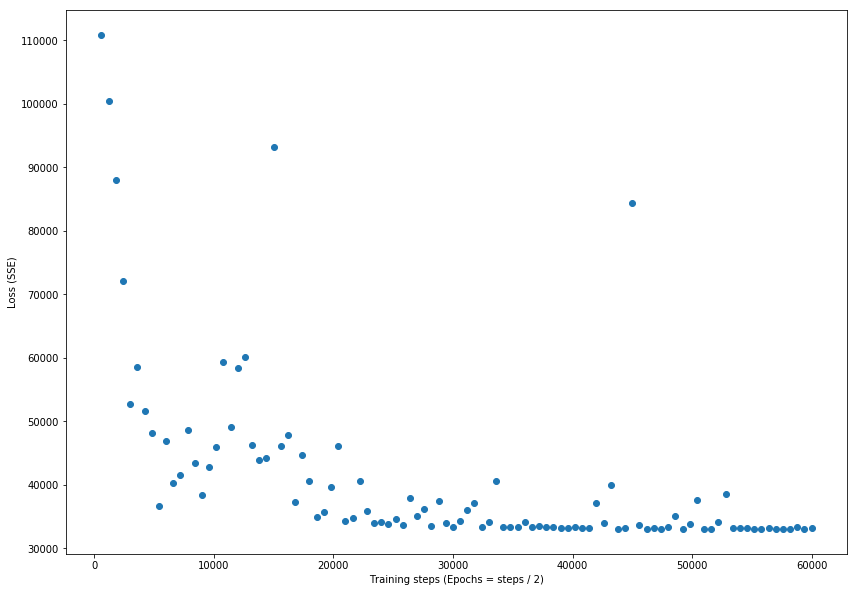

In [42]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps (Epochs = steps / 2)')  
plt.ylabel('Loss (SSE)')  
plt.show() 

In [43]:
pred = regressor.predict(input_fn=avg_temp_pred_input_fn(X_test,  
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_avg_temp_raw_pred_model/model.ckpt-60000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [44]:
from sklearn import metrics

print("The Explained Variance: %.2f" % metrics.explained_variance_score(y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % metrics.mean_absolute_error(y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % metrics.median_absolute_error(y_test, predictions))
print("The Mean Squared Error: %.2f degrees celsius" % metrics.mean_squared_error(y_test, predictions)) 
print("The Root Mean Squared Error: %.2f degrees celsius" % (np.sqrt(metrics.mean_squared_error(y_test, predictions)))) 

The Explained Variance: 0.12
The Mean Absolute Error: 7.06 degrees Celcius
The Median Absolute Error: 5.85 degrees Celcius
The Mean Squared Error: 82.57 degrees celsius
The Root Mean Squared Error: 9.09 degrees celsius
